#### Import required libraries

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

In [2]:
from ipynb.fs.defs.exploratory_visualization import mult_plots_mult_rows, gen_pair_plots

#### Load in required datasets

In [110]:
#### FINAL
## counts
fnl_mn_large = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/counts/final_main_large_cities_core_counts.csv')
fnl_mn_med = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/counts/final_main_medium_cities_core_counts.csv')
fnl_mn_sml = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/counts/final_main_small_cities_core_counts.csv')

## rates
fnl_mn_large_rates = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/rates/final_main_large_cities_core_rates.csv')
fnl_mn_med_rates = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/rates/final_main_medium_cities_core_rates.csv')
fnl_mn_sml_rates = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/rates/final_main_small_cities_core_rates.csv')


####DEMEANED
## counts
fnl_large_core_counts_dm = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_core_dm/final_main_large_cities_core_counts_dm.csv')
fnl_medium_core_counts_dm = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_core_dm/final_main_medium_cities_core_counts_dm.csv')
fnl_small_core_counts_dm = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_core_dm/final_main_small_cities_core_counts_dm.csv')

## rates
fnl_large_core_rates_dm = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_core_dm/final_main_large_cities_core_rates_dm.csv')
fnl_medium_core_rates_dm = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_core_dm/final_main_medium_cities_core_rates_dm.csv')
fnl_small_core_rates_dm = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_core_dm/final_main_small_cities_core_rates_dm.csv')

In [105]:
## Define years for ticks
Years =[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
xtick_years = [1990, 1995, 2000, 2005, 2010, 2015]

In [125]:
### to get dependent var plot on 1st row and reqd ind vars plots one below other next

def mult_var_plots_mult_rows(req_dfs, groupby_var, x_var, y_var_list, x_label, 
                            y_label_lst, plt_titles, fig_title, weighted=None, weights_var=None):
    fig, axs = plt.subplots(nrows=len(y_var_list), ncols=len(req_dfs), figsize=(20, 24), constrained_layout=True)
    
    row_count = 0
    for rw in range(len(y_var_list)):
        col_count = 0 ## to keep track of dataframe being iterated from the req_dfs list and also for col position on a given row
        for req_df in req_dfs:
            y_var = y_var_list[rw]
            if weighted:
                axs[rw, col_count].plot(x_var, req_df.groupby(f'{groupby_var}').apply(create_weighted_avgs, f'{y_var}', f'{weights_var}'), label=y_var)
            else:
                axs[rw, col_count].plot(x_var, req_df.groupby(f'{groupby_var}')[f'{y_var}'].mean(), label=y_var)
            
            axs[0,col_count].set_title(plt_titles[col_count], fontsize=20)
            
            axs[row_count, col_count].set_xticks(xtick_years) 
            axs[row_count, col_count].set_xticklabels(xtick_years, fontsize=11, rotation=45)
            
            col_count += 1
            
        axs[row_count,0].set_ylabel(y_label_lst[row_count], fontsize=20)
        
        row_count += 1

    fig.suptitle(fig_title, fontsize=20)

#### Final - Violent Crime vs Other Core Vars

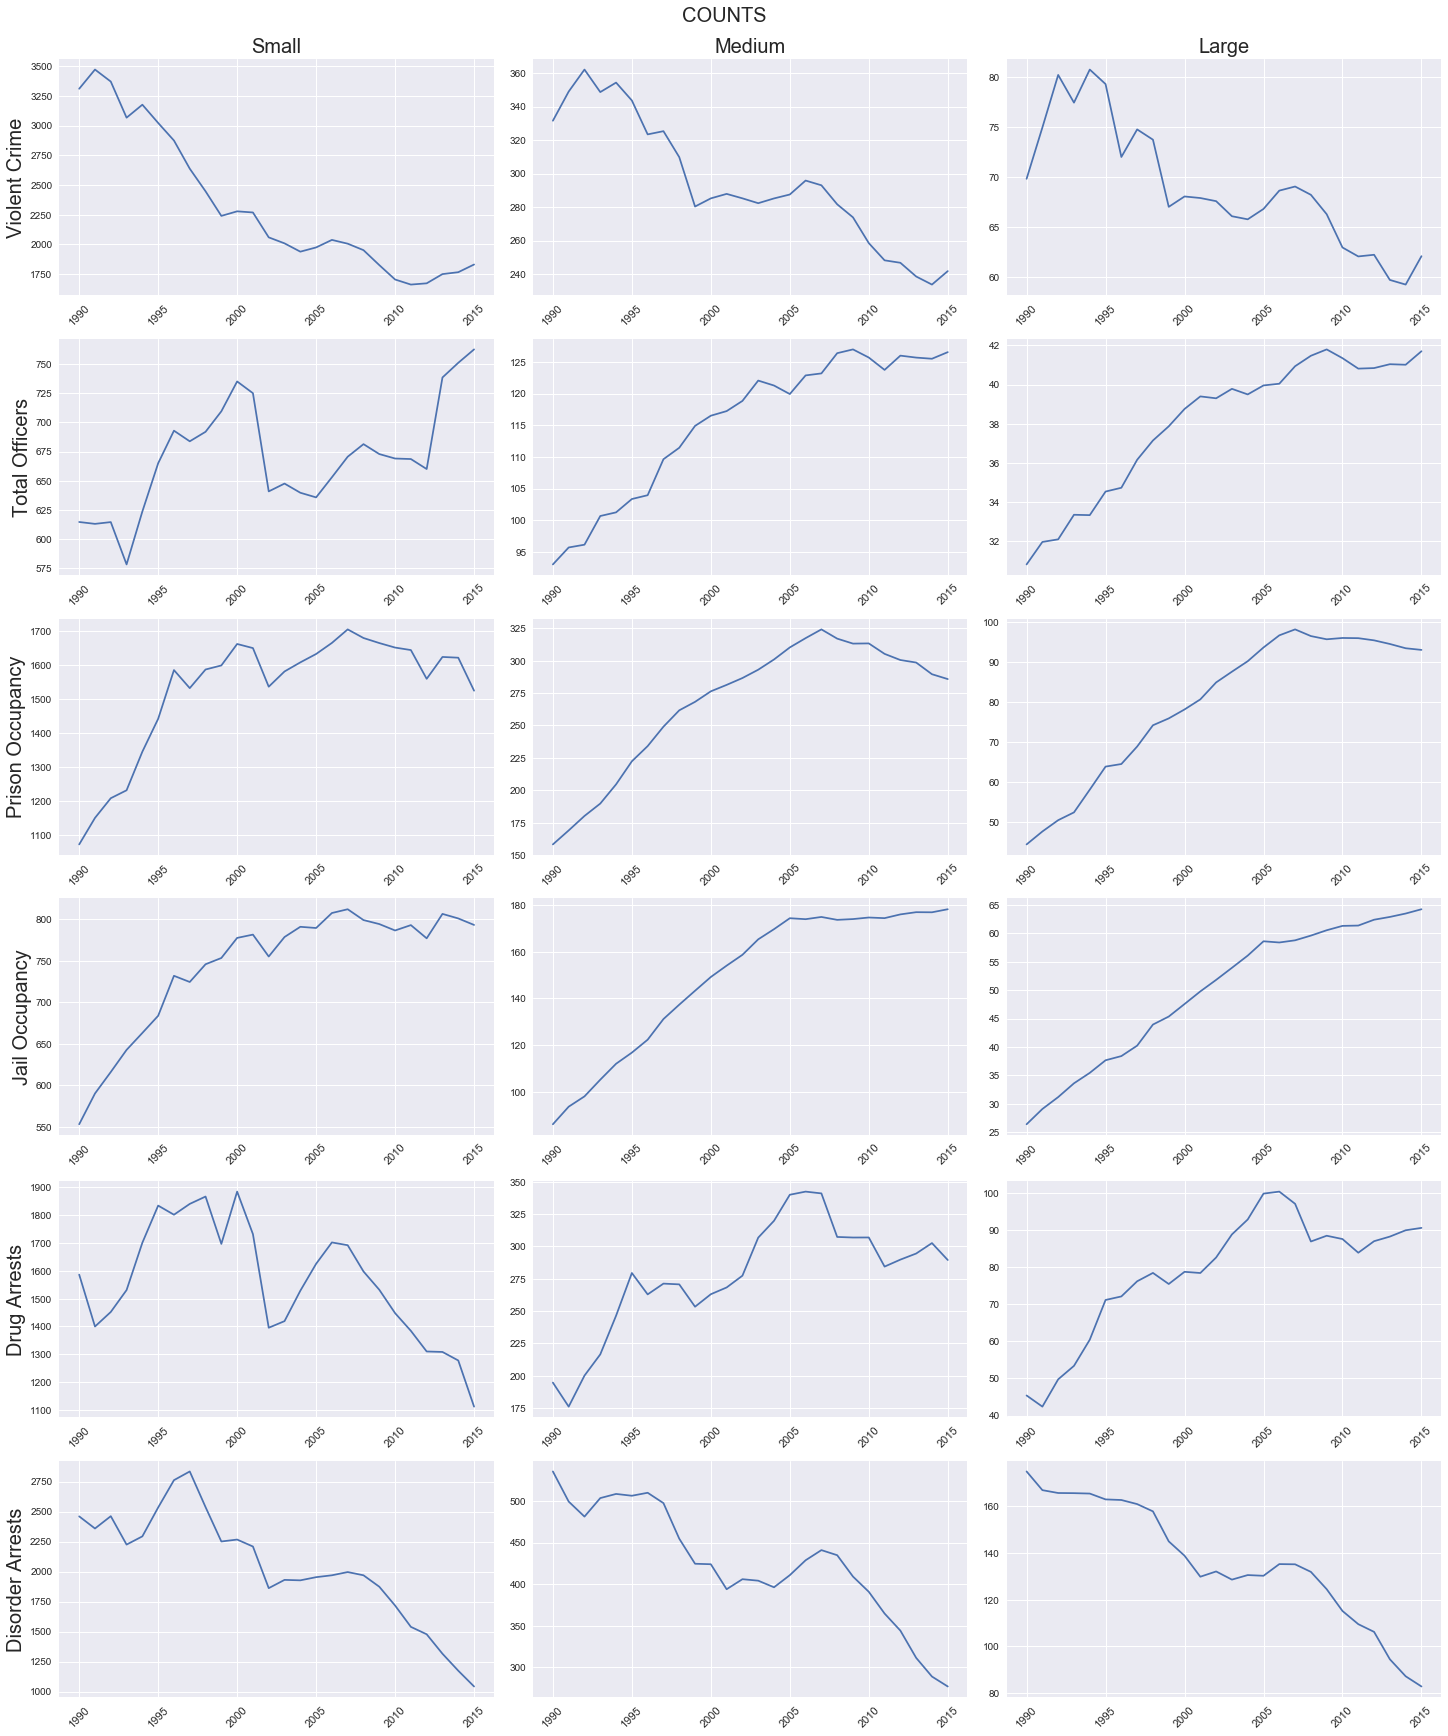

In [113]:
mult_var_plots_mult_rows(req_dfs=[fnl_mn_large, fnl_mn_med, fnl_mn_sml],
                                               groupby_var='YEAR',
                                               y_var_list = ['violent_crime', 'total_officers', 
                                                             'prison_occupancy_count', 'jail_occupancy_count',
                                                             'drug_tot_arrests', 'disorder_arrests_tot_index'],
                                               x_var = Years,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'COUNTS')

#### Demeaned - Violent Crime vs Other Core Vars

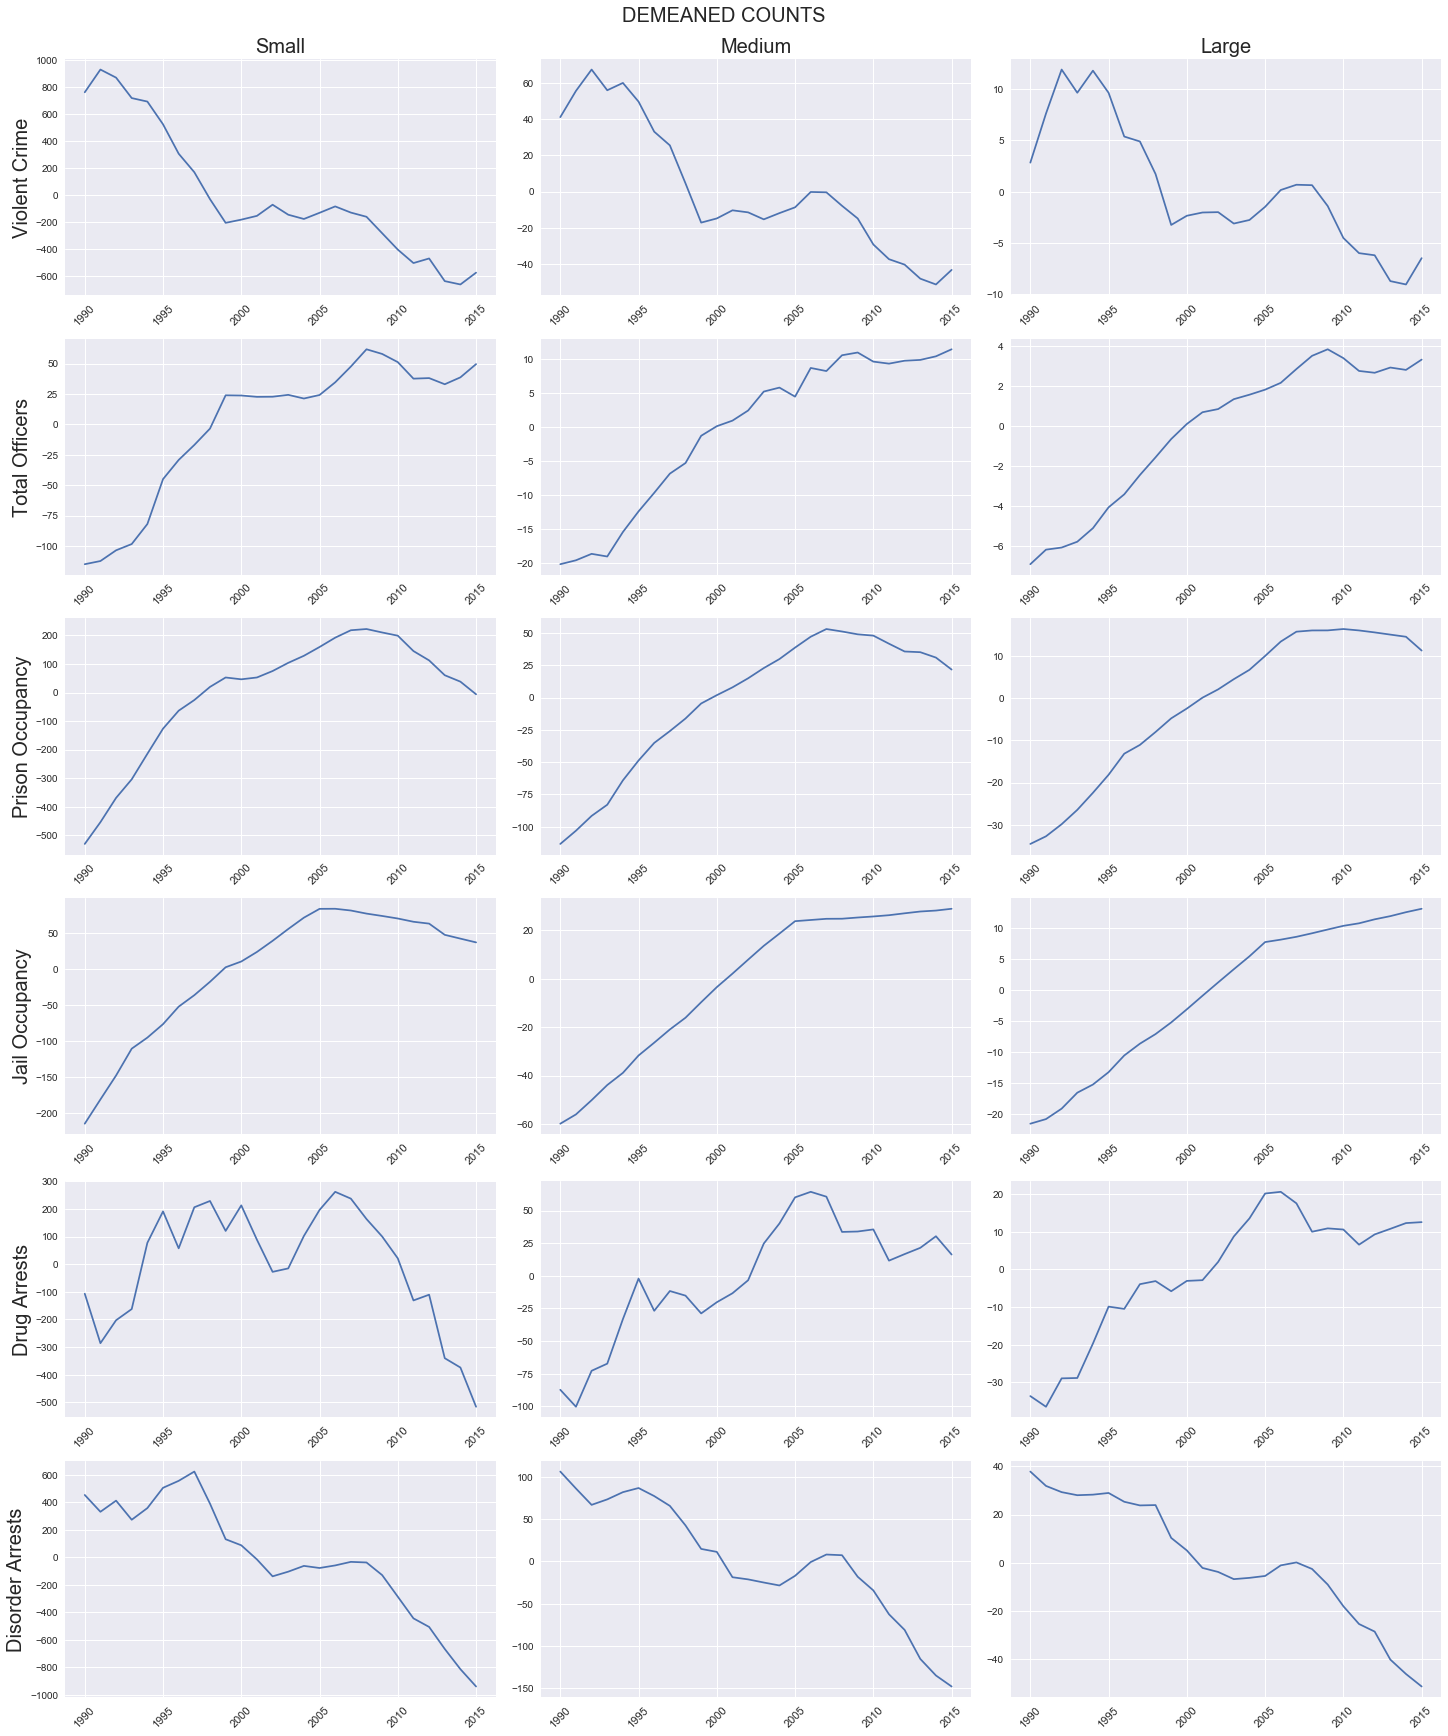

In [114]:
mult_var_plots_mult_rows(req_dfs=[fnl_large_core_counts_dm, fnl_medium_core_counts_dm, fnl_small_core_counts_dm],
                                               groupby_var='YEAR',
                                               y_var_list = ['dm_violent_crime', 'dm_total_officers', 
                                                             'dm_prison_occupancy_count', 'dm_jail_occupancy_count',
                                                             'dm_drug_tot_arrests', 'dm_disorder_arrests_tot_index'],
                                               x_var = Years,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'DEMEANED COUNTS')

#### Final - Violent Crime vs Other Core Vars - Rates

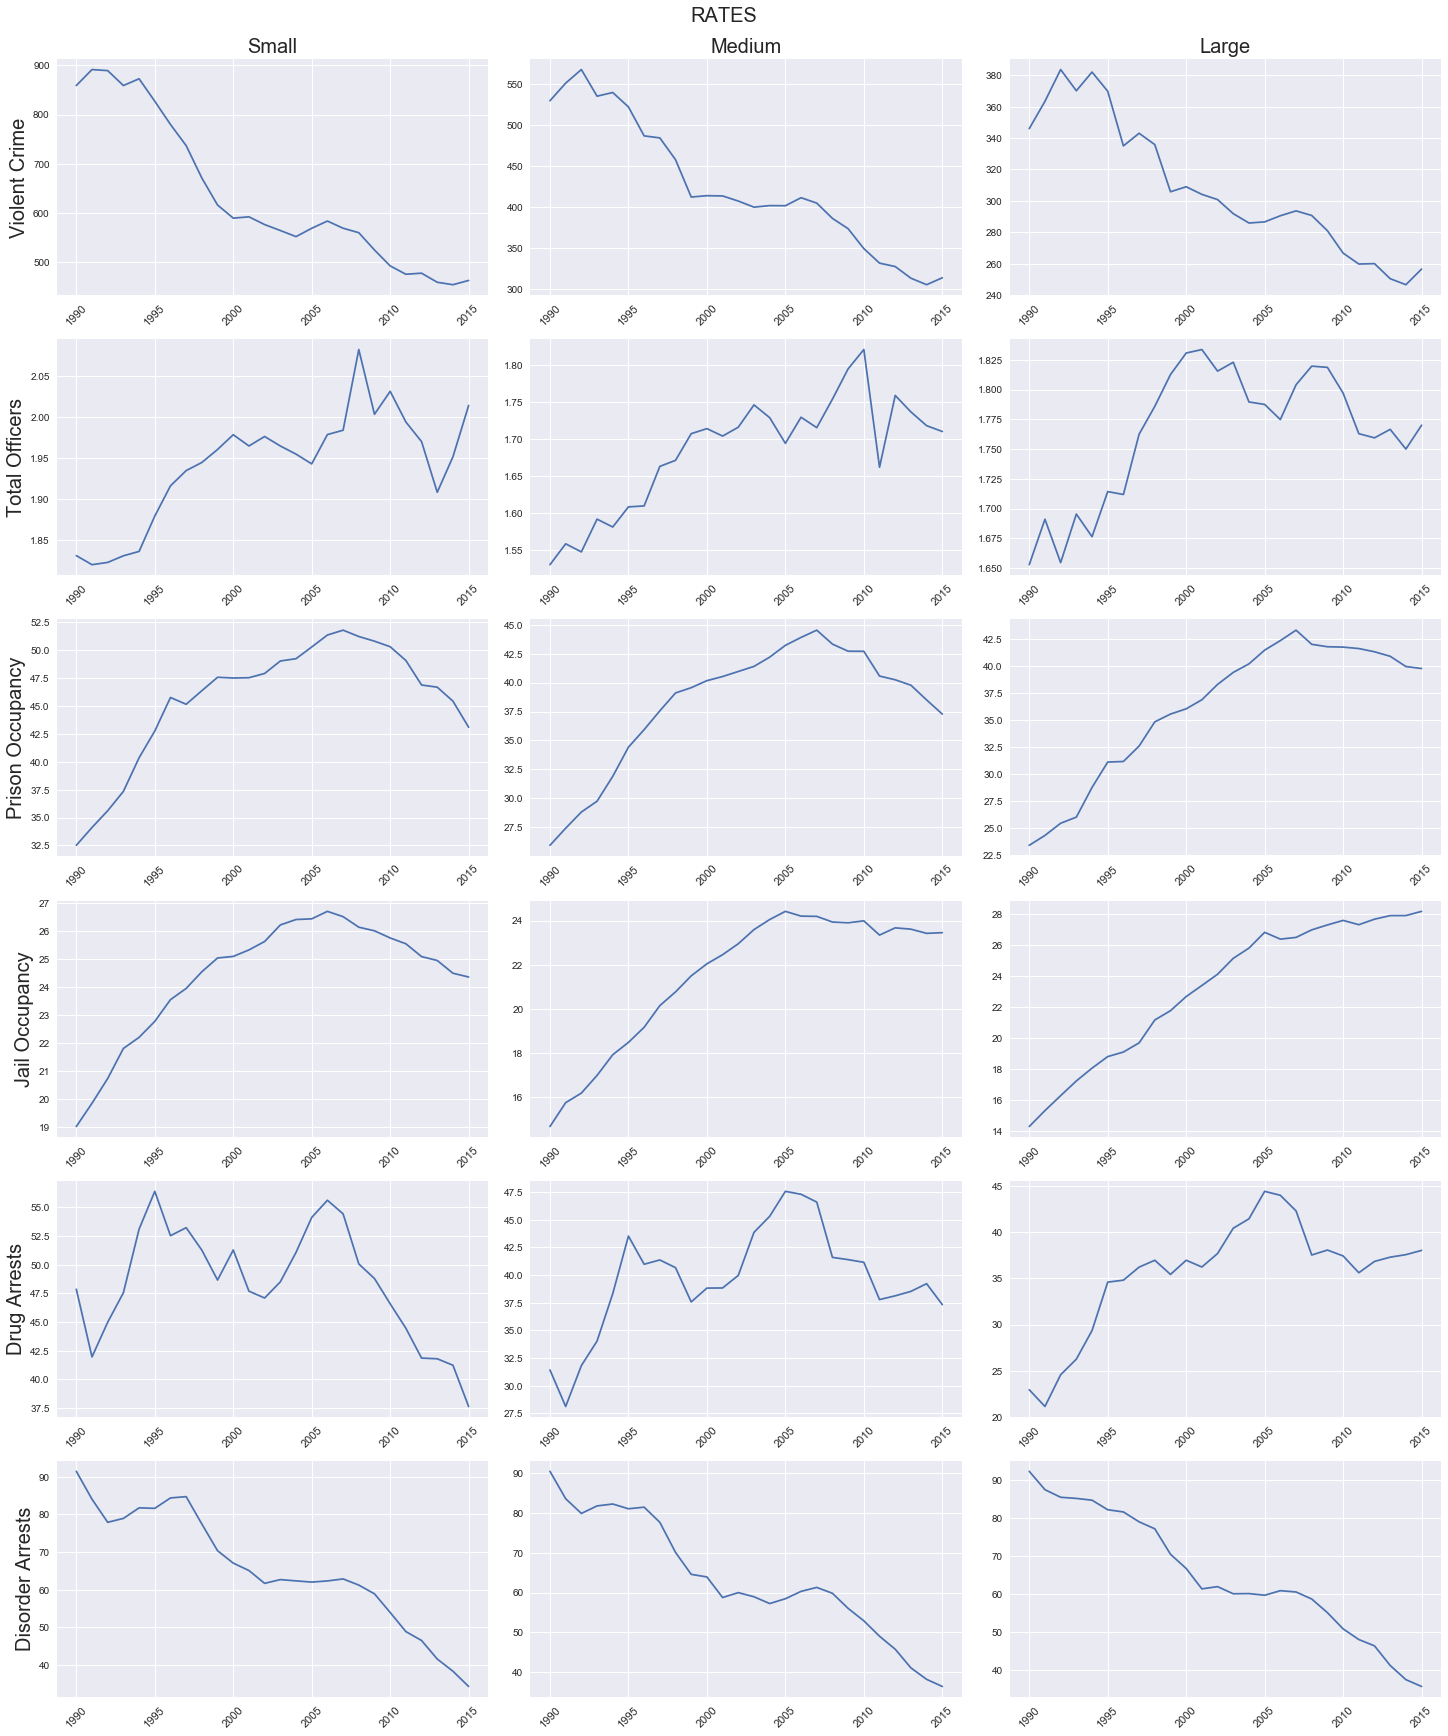

In [116]:
mult_var_plots_mult_rows(req_dfs=[fnl_mn_large_rates, fnl_mn_med_rates, fnl_mn_sml_rates],
                                               groupby_var='YEAR',
                                               y_var_list = ['violent_crime_rate', 'total_officers_rate', 
                                                             'prison_occupancy_count_rate', 'jail_occupancy_count_rate',
                                                             'drug_tot_arrests_rate', 'disorder_arrests_tot_index_rate'],
                                               x_var = Years,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'RATES')

#### Demeaned - Violent Crime vs Other Core Vars - Rates

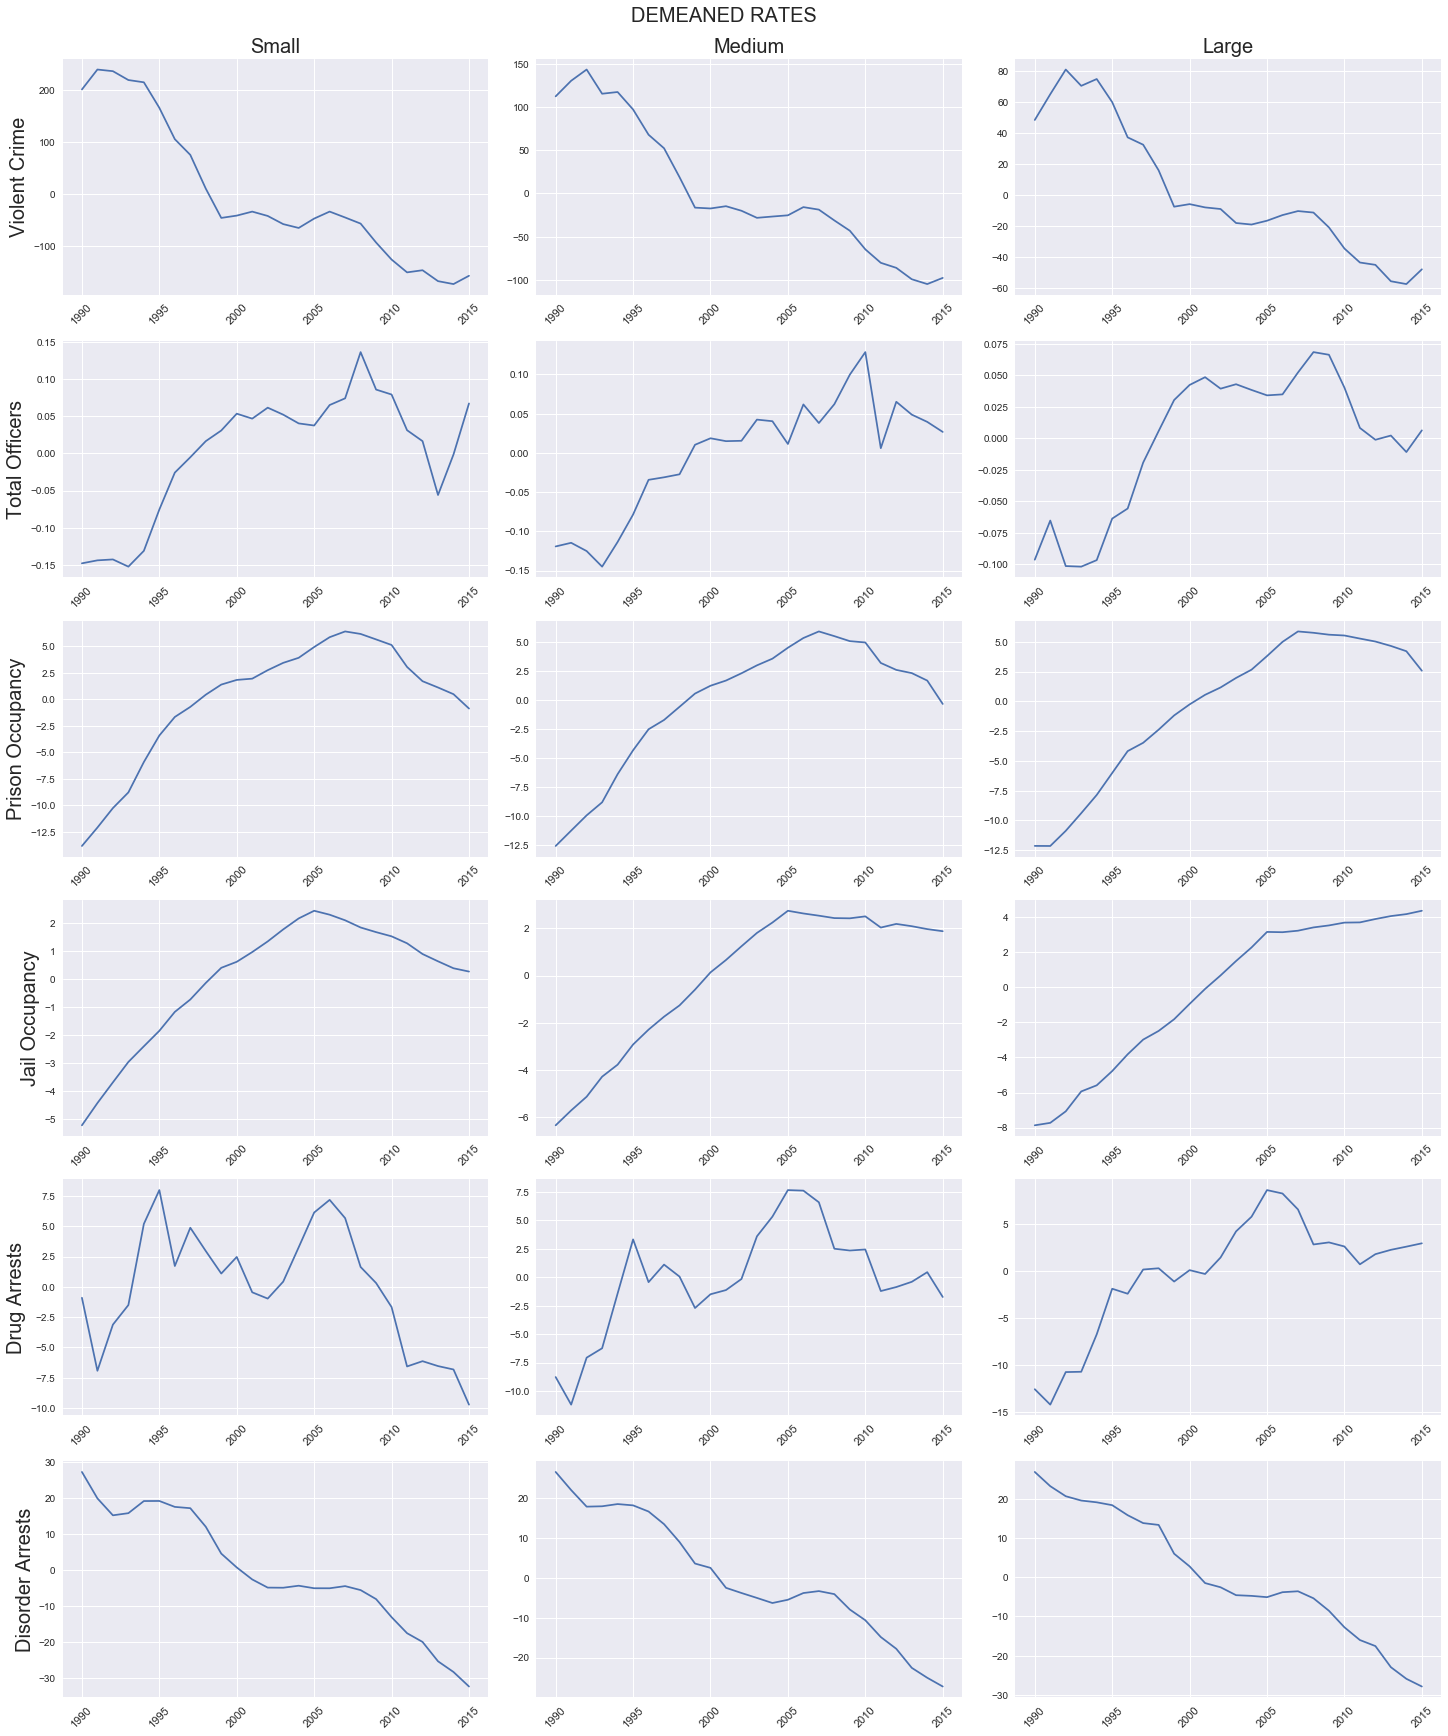

In [118]:
mult_var_plots_mult_rows(req_dfs=[fnl_large_core_rates_dm, fnl_medium_core_rates_dm, fnl_small_core_rates_dm],
                                               groupby_var='YEAR',
                                               y_var_list = ['dm_violent_crime_rate', 'dm_total_officers_rate', 
                                                             'dm_prison_occupancy_count_rate', 'dm_jail_occupancy_count_rate',
                                                             'dm_drug_tot_arrests_rate', 'dm_disorder_arrests_tot_index_rate'],
                                               x_var = Years,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'DEMEANED RATES')

### CORRELATION MATRIX

In [166]:
def generate_corr_heatmaps_multiple(req_dfs, var_list, fig_title):
    sns.set(font_scale=1.8)
    fig, ax =plt.subplots(1,len(req_dfs), figsize=(30, 8))
    fig.subplots_adjust(wspace=0.5)

    count = 0
    for df in req_dfs:
        var_corr = df.loc[:, var_list[count]].corr()
        # plot the heatmap and annotation on it
        sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns, 
                    annot=True, cmap='Greens', ax=ax[count])
        count += 1
    fig.suptitle(fig_title, fontsize=24)

#### Large - Violent Crime vs Core Vars - Counts and Demeaned Counts 

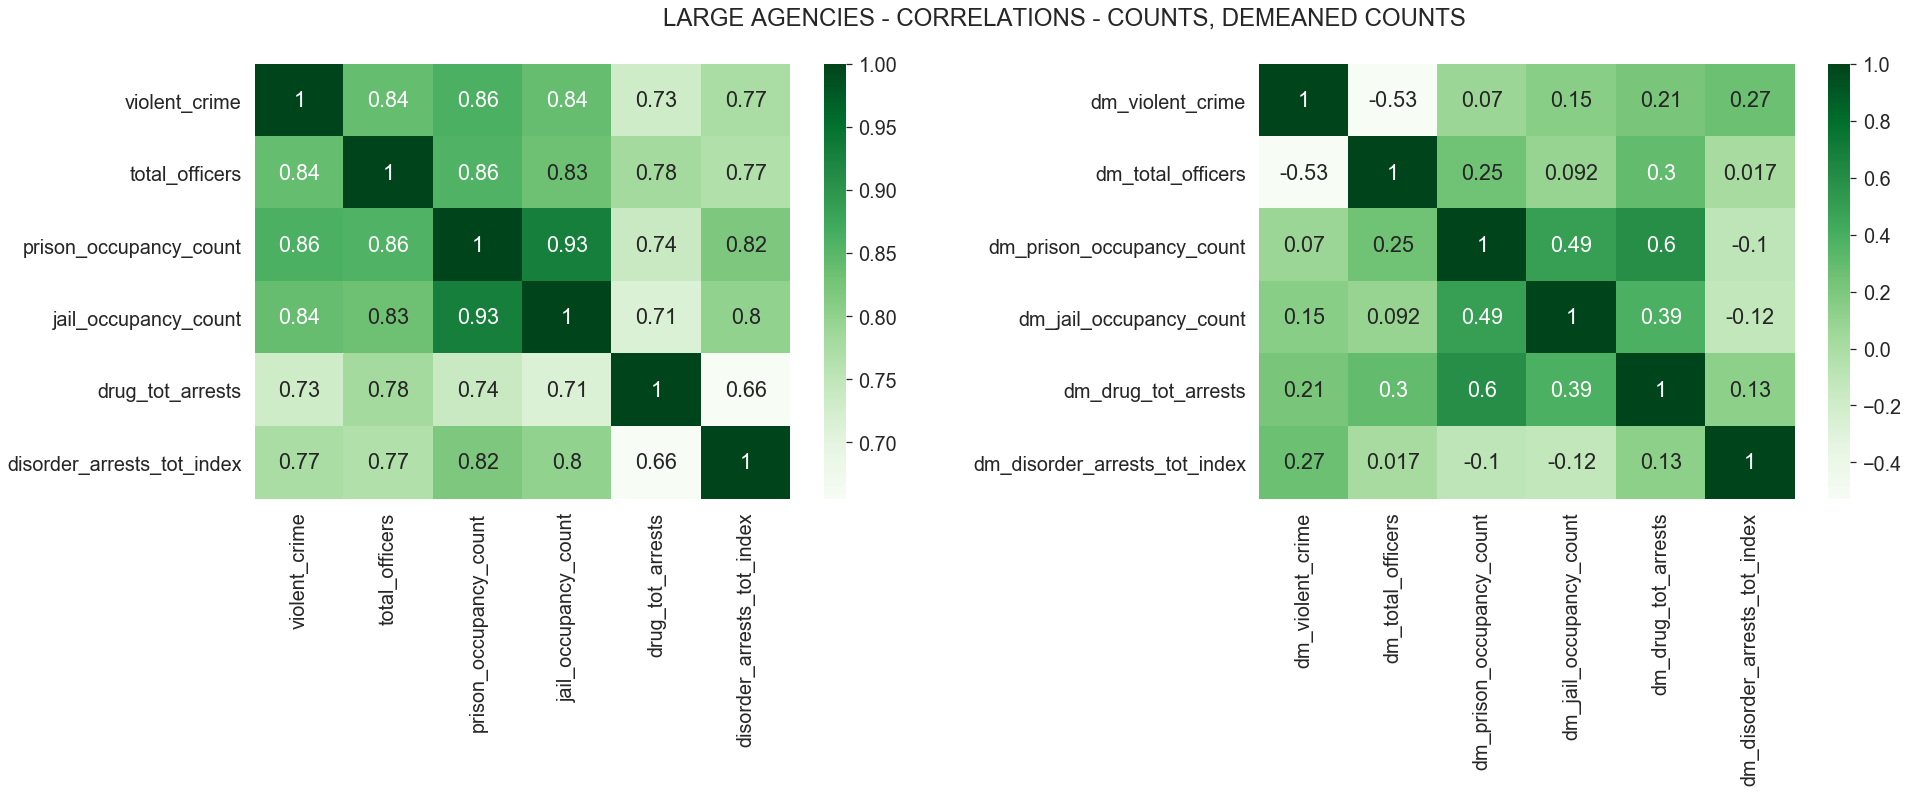

In [167]:
generate_corr_heatmaps_multiple(req_dfs=[fnl_mn_large, fnl_large_core_counts_dm],
                                var_list = [['violent_crime', 'total_officers', 'prison_occupancy_count', 'jail_occupancy_count',
                                  'drug_tot_arrests', 'disorder_arrests_tot_index'], 
                                 ['dm_violent_crime', 'dm_total_officers', 'dm_prison_occupancy_count',
                                  'dm_jail_occupancy_count', 'dm_drug_tot_arrests', 'dm_disorder_arrests_tot_index']],
                                fig_title='LARGE AGENCIES - CORRELATIONS - COUNTS, DEMEANED COUNTS')

#### Medium - Violent Crime vs Core Vars - Counts and Demeaned Counts 

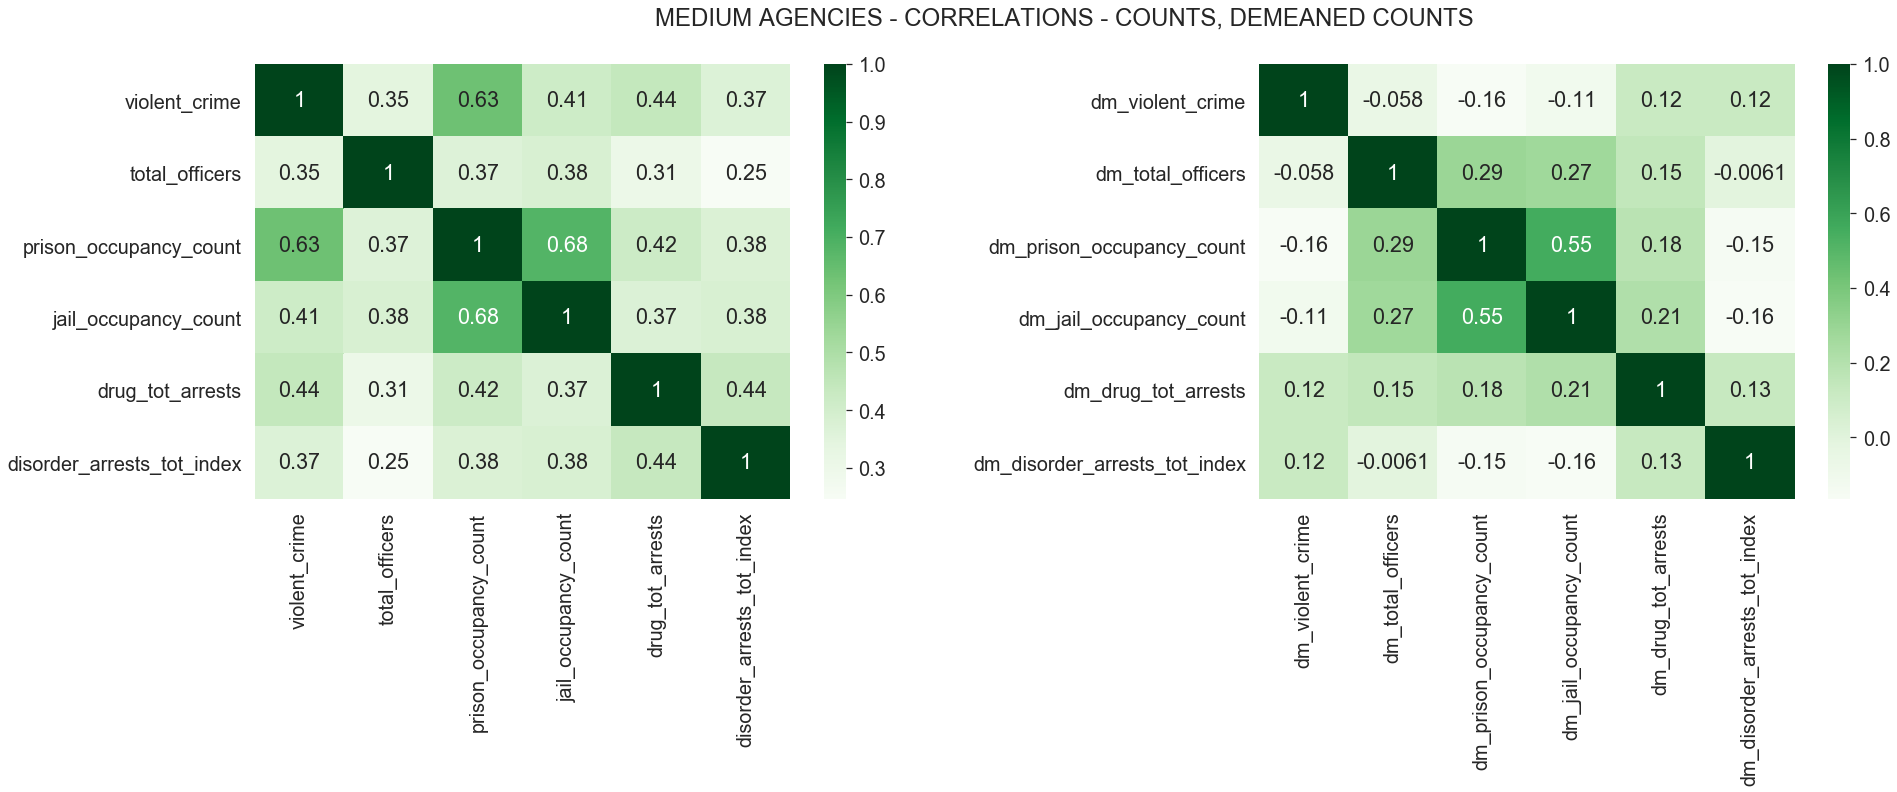

In [168]:
generate_corr_heatmaps_multiple(req_dfs=[fnl_mn_med, fnl_medium_core_counts_dm],
                                var_list = [['violent_crime', 'total_officers', 'prison_occupancy_count', 'jail_occupancy_count',
                                  'drug_tot_arrests', 'disorder_arrests_tot_index'], 
                                 ['dm_violent_crime', 'dm_total_officers', 'dm_prison_occupancy_count',
                                  'dm_jail_occupancy_count', 'dm_drug_tot_arrests', 'dm_disorder_arrests_tot_index']],
                               fig_title='MEDIUM AGENCIES - CORRELATIONS - COUNTS, DEMEANED COUNTS')

#### Small - Violent Crime vs Core Vars - Counts and Demeaned Counts 

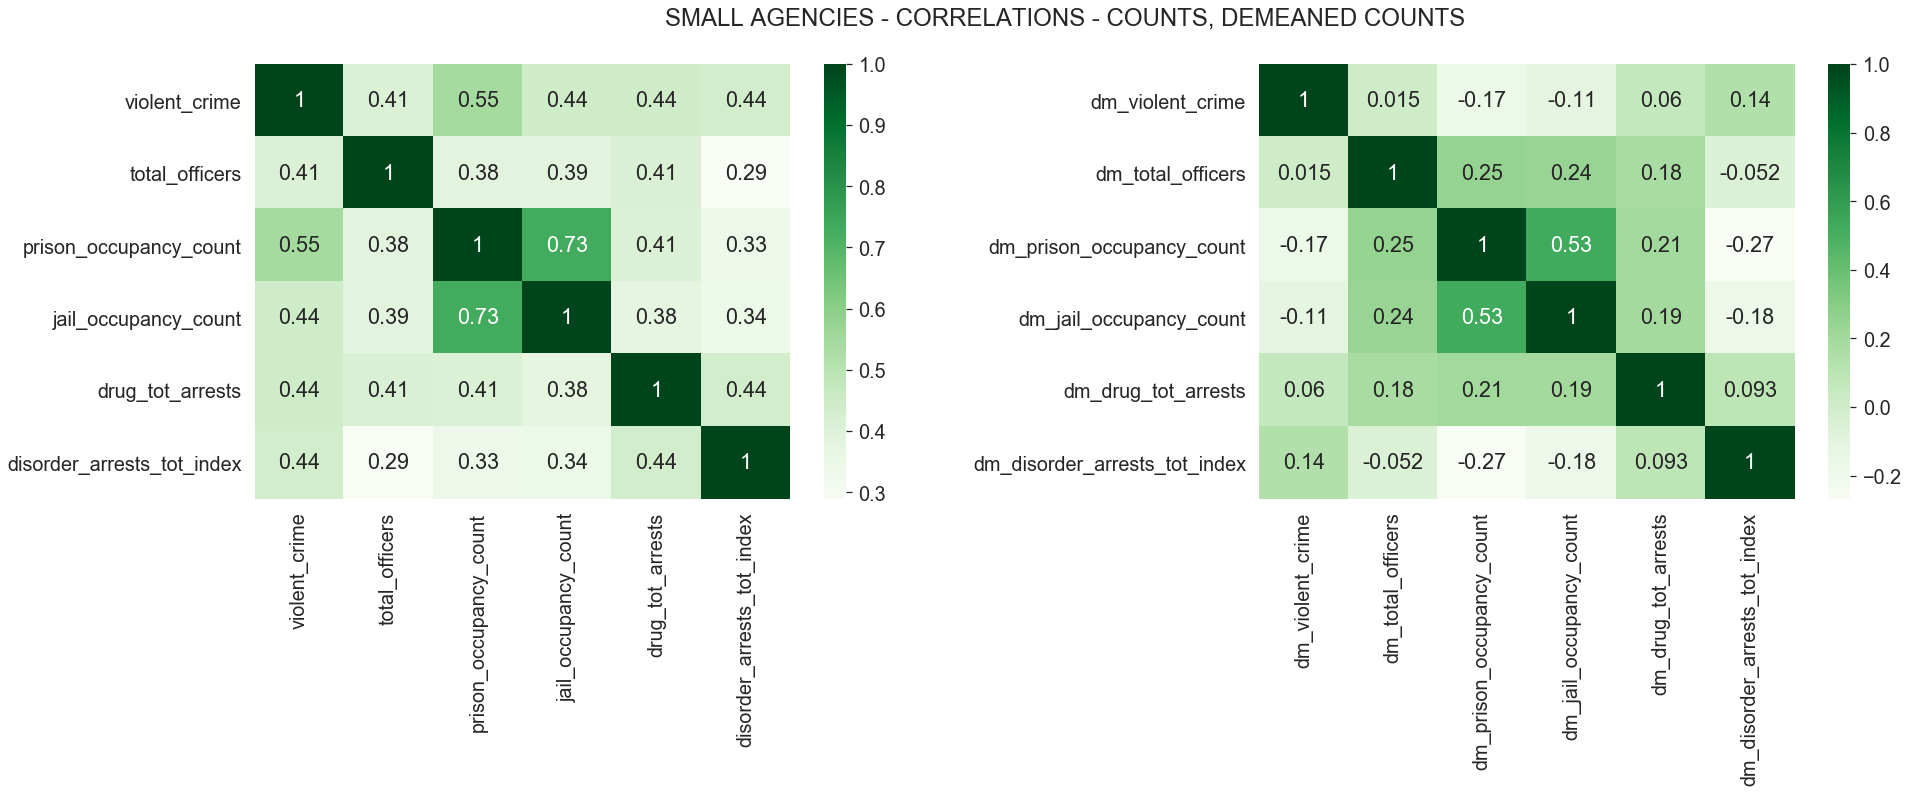

In [162]:
generate_corr_heatmaps_multiple(req_dfs=[fnl_mn_sml, fnl_small_core_counts_dm],
                                var_list = [['violent_crime', 'total_officers', 'prison_occupancy_count', 'jail_occupancy_count',
                                  'drug_tot_arrests', 'disorder_arrests_tot_index'], 
                                 ['dm_violent_crime', 'dm_total_officers', 'dm_prison_occupancy_count',
                                  'dm_jail_occupancy_count', 'dm_drug_tot_arrests', 'dm_disorder_arrests_tot_index']],
                               fig_title='SMALL AGENCIES - CORRELATIONS - COUNTS, DEMEANED COUNTS')

#### Large - Violent Crime vs Core Vars - Rates and Demeaned Rates

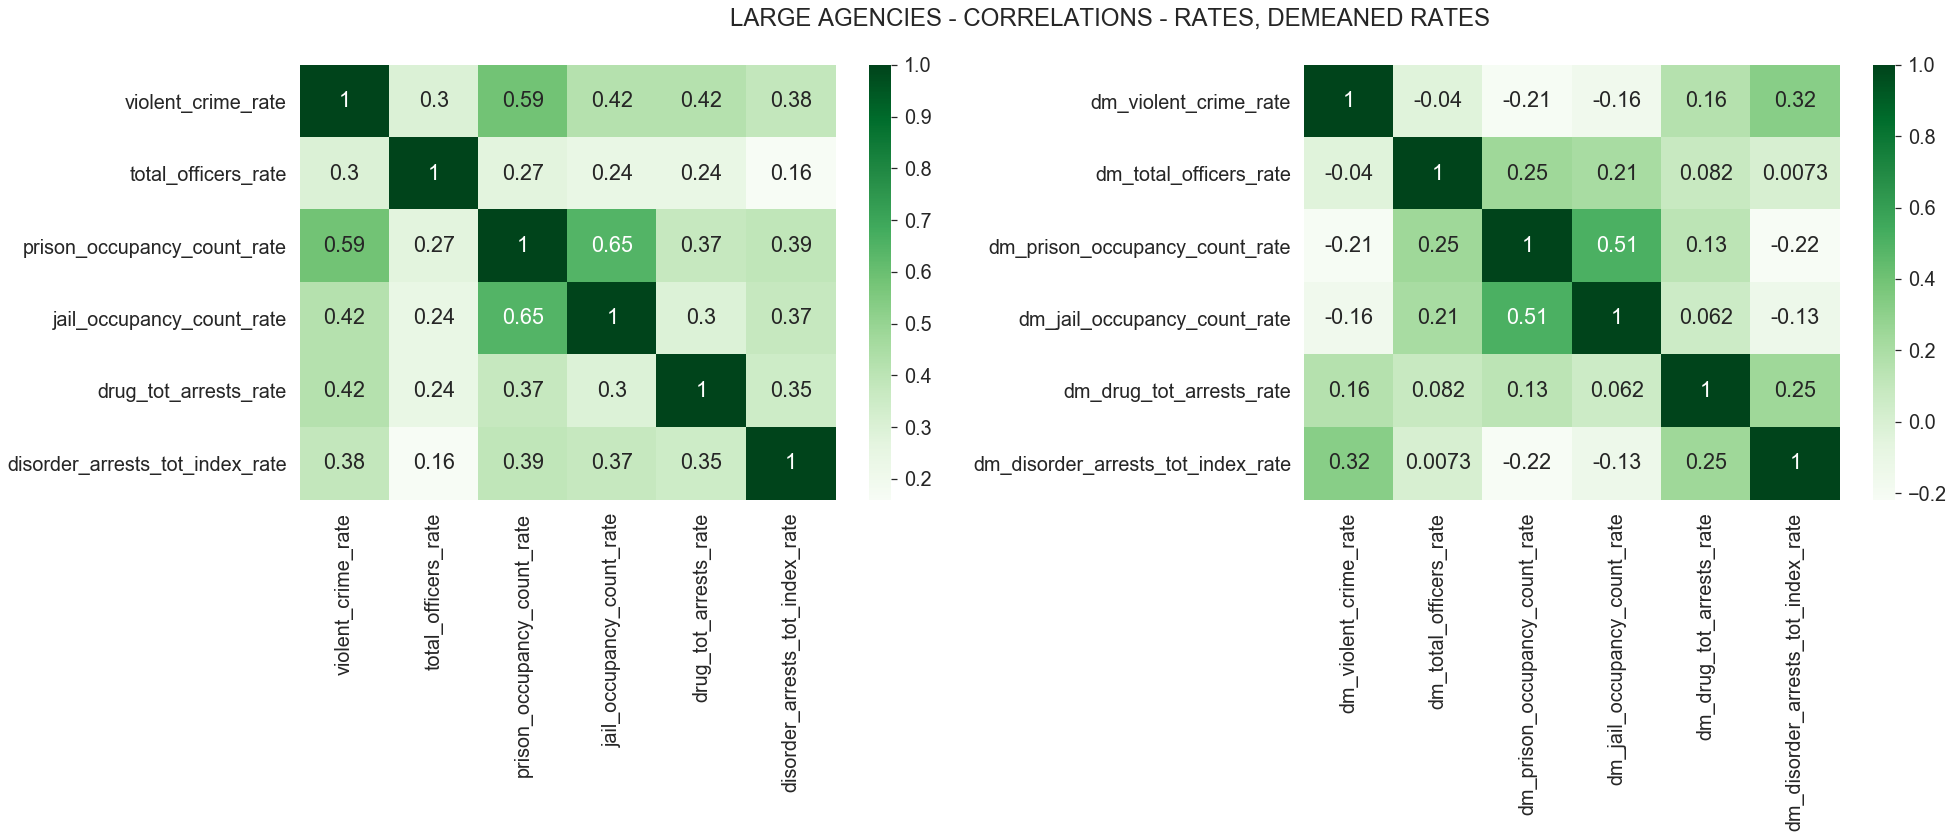

In [174]:
generate_corr_heatmaps_multiple(req_dfs=[fnl_mn_large_rates, fnl_large_core_rates_dm],
                                var_list = [['violent_crime_rate', 'total_officers_rate', 
                                                             'prison_occupancy_count_rate', 'jail_occupancy_count_rate',
                                                             'drug_tot_arrests_rate', 'disorder_arrests_tot_index_rate'], 
                                 ['dm_violent_crime_rate', 'dm_total_officers_rate', 
                                                             'dm_prison_occupancy_count_rate', 'dm_jail_occupancy_count_rate',
                                                             'dm_drug_tot_arrests_rate', 'dm_disorder_arrests_tot_index_rate']],
                                fig_title='LARGE AGENCIES - CORRELATIONS - RATES, DEMEANED RATES')

#### Medium - Violent Crime vs Core Vars - Rates and Demeaned Rates

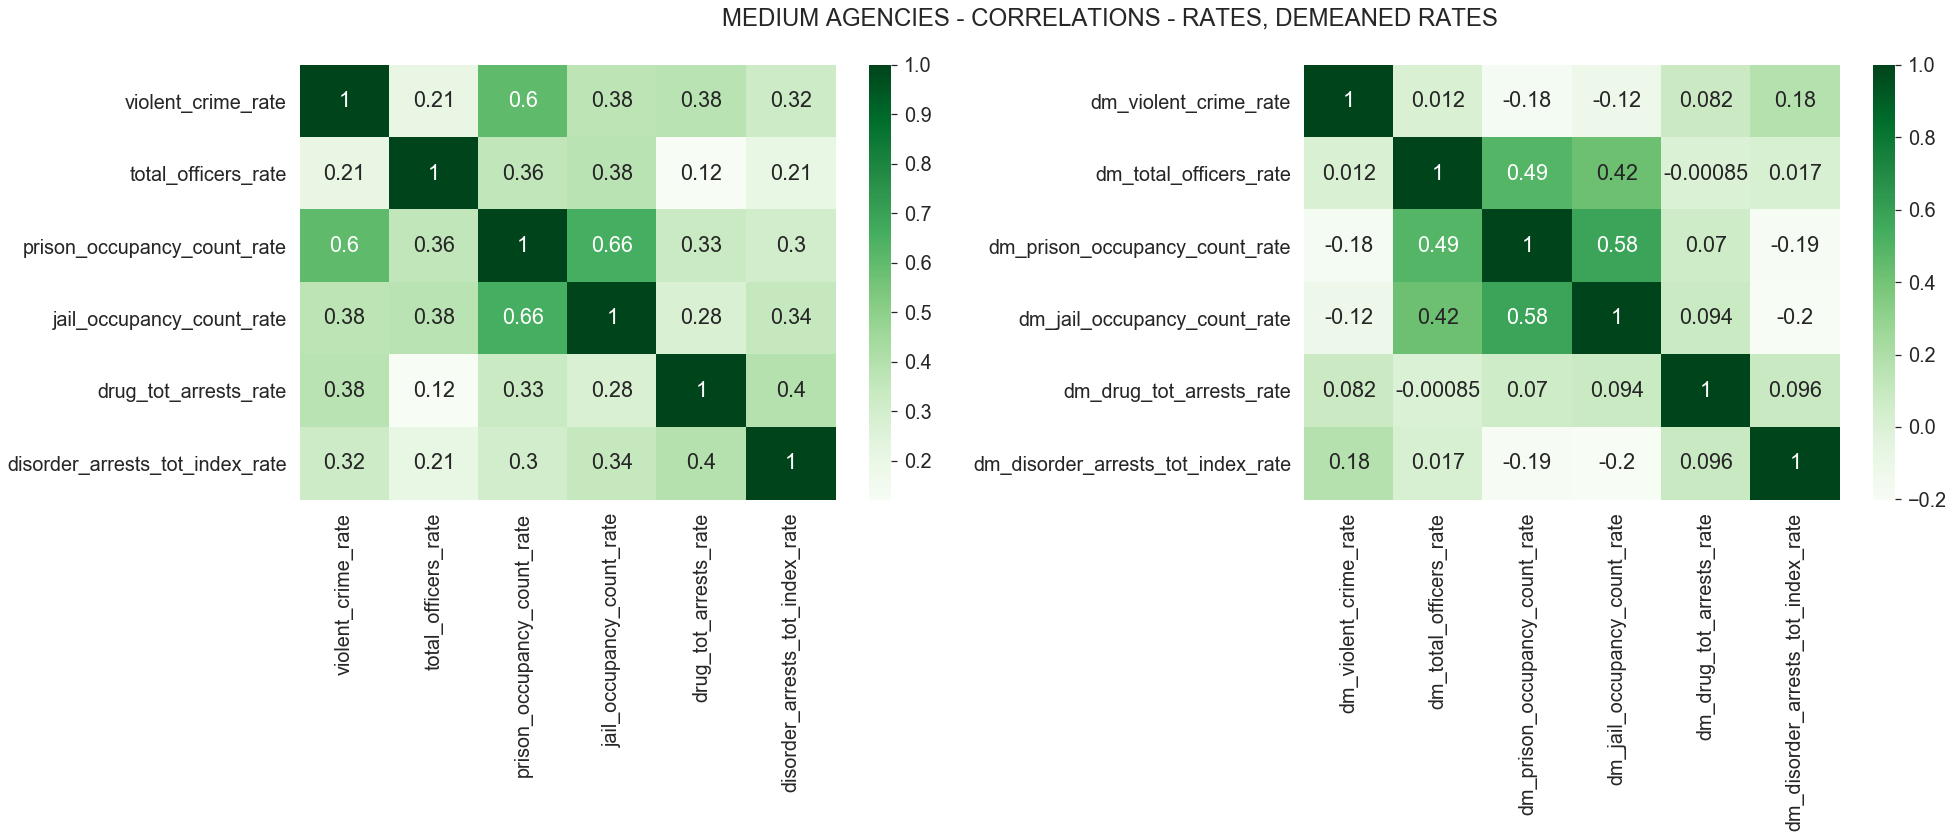

In [175]:
generate_corr_heatmaps_multiple(req_dfs=[fnl_mn_med_rates, fnl_medium_core_rates_dm],
                                var_list = [['violent_crime_rate', 'total_officers_rate', 
                                                             'prison_occupancy_count_rate', 'jail_occupancy_count_rate',
                                                             'drug_tot_arrests_rate', 'disorder_arrests_tot_index_rate'], 
                                 ['dm_violent_crime_rate', 'dm_total_officers_rate', 
                                                             'dm_prison_occupancy_count_rate', 'dm_jail_occupancy_count_rate',
                                                             'dm_drug_tot_arrests_rate', 'dm_disorder_arrests_tot_index_rate']],
                                fig_title='MEDIUM AGENCIES - CORRELATIONS - RATES, DEMEANED RATES')

#### Small - Violent Crime vs Core Vars - Rates and Demeaned Rates

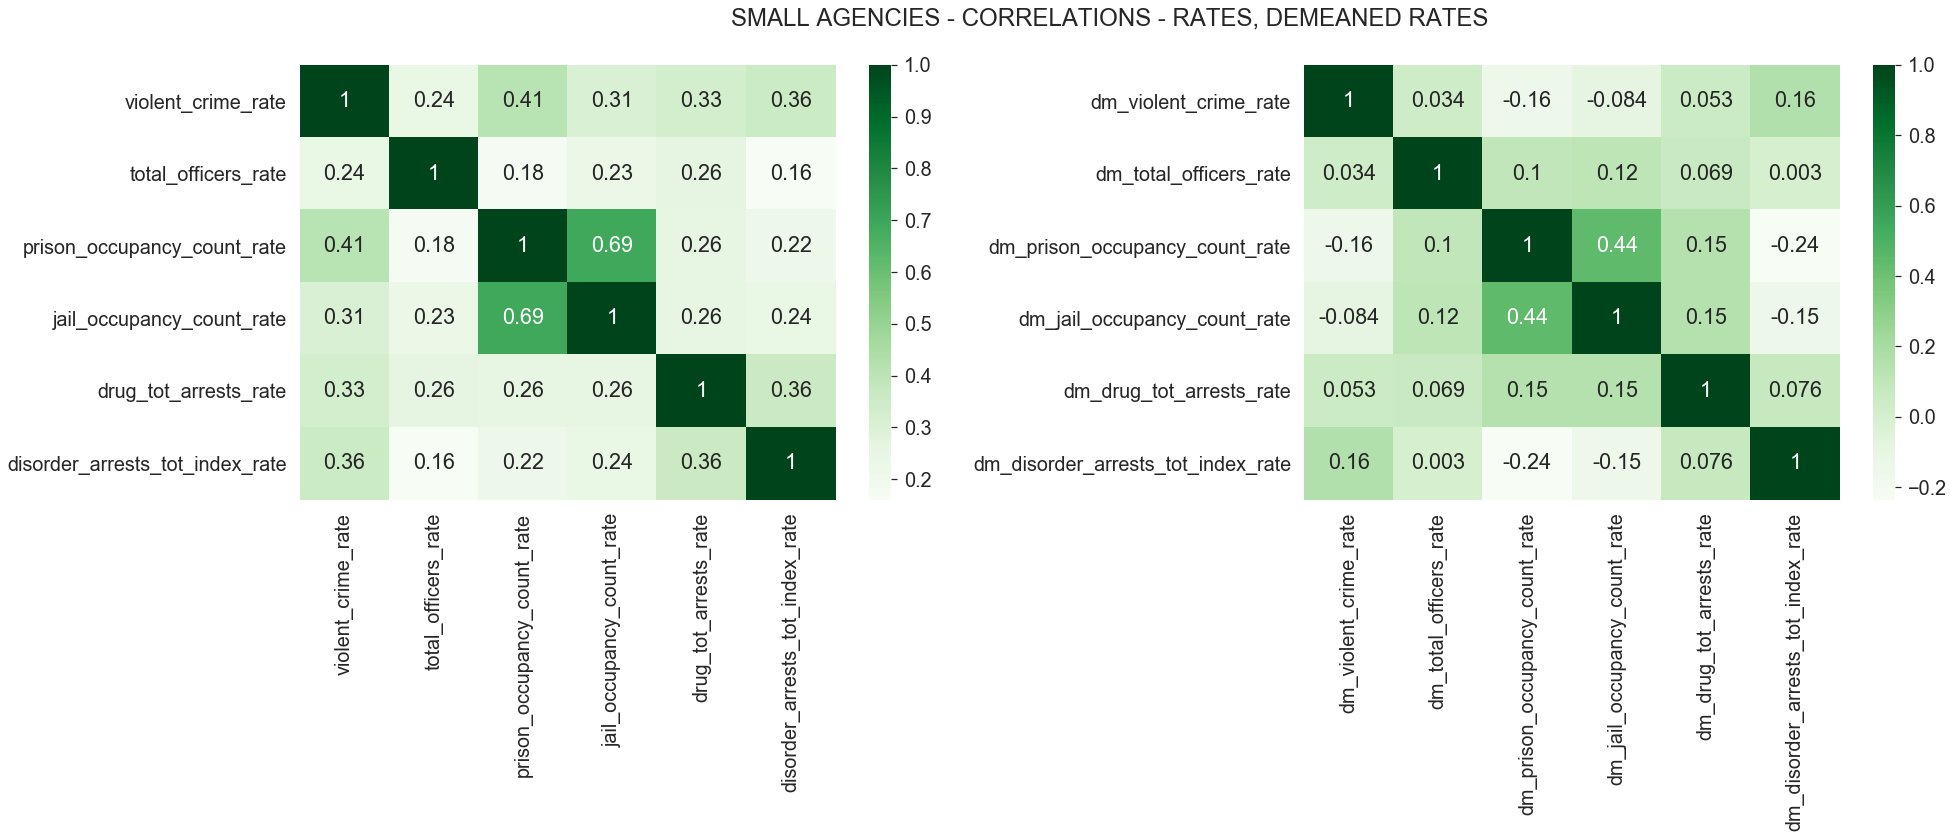

In [176]:
generate_corr_heatmaps_multiple(req_dfs=[fnl_mn_sml_rates, fnl_small_core_rates_dm],
                                var_list = [['violent_crime_rate', 'total_officers_rate', 
                                                             'prison_occupancy_count_rate', 'jail_occupancy_count_rate',
                                                             'drug_tot_arrests_rate', 'disorder_arrests_tot_index_rate'], 
                                 ['dm_violent_crime_rate', 'dm_total_officers_rate', 
                                                             'dm_prison_occupancy_count_rate', 'dm_jail_occupancy_count_rate',
                                                             'dm_drug_tot_arrests_rate', 'dm_disorder_arrests_tot_index_rate']],
                                fig_title='SMALL AGENCIES - CORRELATIONS - RATES, DEMEANED RATES')